<a href="https://colab.research.google.com/github/OlimpiaGarcia/Book_algorithm/blob/main/Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [ ]:
# imports generales
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno  as msno
import ast
import xgboost as xgb
import seaborn as sns


# imports de modelo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE


# imports de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# imports de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# conexión con google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Leer csv de drive

In [ ]:
ruta_dir = "/content/drive/MyDrive/Colab Notebooks/octavo/benji/reto /data/train"

# Creacion de DF

## leer CSV y pasarlo a DF

In [ ]:
data = pd.read_csv(os.path.join(ruta_dir, 'train_scaled.csv'), encoding='utf-8')

In [ ]:
text = pd.read_csv(os.path.join(ruta_dir, 'train_text.csv'), encoding='utf-8')

In [ ]:
data.sample(10)

,id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1,...,محمد عبد الرحمن العريفي,محمد قطب,مصطفى صادق الرافعي,مصطفى محمود,نور عبدالمجيد,هبة سيد عبد العاطي,يحيى بن شرف النووي,يوسف زيدان,ปรีดี พนมยงค์,နုနုရည်အင်းဝ
10058,10058,0.087025,-0.039511,-0.185749,0.804125,-0.013341,-0.020810,-0.094708,-0.166263,-0.131631,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7513,7513,0.106805,-0.190308,-0.219446,-0.105763,-0.173178,-0.200519,-0.199271,-0.162601,-0.117814,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7350,7350,0.514267,-0.191256,-0.201491,0.258192,-0.167882,-0.197883,-0.215995,-0.186370,-0.141378,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
4645,4645,0.015818,-0.101077,0.026553,0.591817,-0.086435,-0.076759,-0.146948,-0.161802,-0.129703,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
1516,1516,-0.130552,-0.094119,-0.095277,-0.045104,-0.116085,-0.064382,-0.046644,-0.107871,-0.130560,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
8678,8678,-0.830755,0.461622,1.339121,-0.227082,0.231718,0.633042,0.750890,0.625121,0.182952,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
5785,5785,-0.312526,-0.198471,-0.216222,0.804125,-0.160451,-0.216257,-0.235324,-0.218995,-0.166549,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7267,7267,-0.585486,-0.219069,-0.232976,0.652477,-0.181054,-0.242355,-0.248844,-0.222124,-0.167406,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
11329,11329,-0.581530,-0.176640,-0.163368,0.743465,-0.135188,-0.203321,-0.217463,-0.188168,-0.133345,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778
7118,7118,0.799096,-0.268192,-0.322752,0.136873,-0.229260,-0.290105,-0.300671,-0.260941,-0.183365,...,-0.008778,-0.015205,-0.008778,-0.015205,-0.008778,-0.008778,-0.008778,0.0,0.0,-0.008778


In [ ]:
text.sample(10)

,id,cover_image_uri,book_title,book_details
8210,8210,https://images-na.ssl-images-amazon.com/images...,House Made of Dawn,\nThe magnificent Pulitzer Prize-winning novel...
1628,1628,https://images-na.ssl-images-amazon.com/images...,Shadows of the Workhouse,"In this follow up to CALL THE MIDWIFE, Jennife..."
8027,8027,https://images-na.ssl-images-amazon.com/images...,The Redbreast,The Redbreast is a fabulous introduction to Ne...
9574,9574,https://images-na.ssl-images-amazon.com/images...,Perfect Health: The Complete Mind/Body Guide,NATIONAL BESTSELLER • The classic guide to usi...
9883,9883,https://images-na.ssl-images-amazon.com/images...,The City & the City,When a murdered woman is found in the city of ...
9737,9737,https://images-na.ssl-images-amazon.com/images...,In the Hand of the Goddess,"Disguised as a boy, Alanna of Trebond becomes ..."
10497,10497,https://images-na.ssl-images-amazon.com/images...,Miracle Myx,Two near-death experiences have transformed My...
1665,1665,https://images-na.ssl-images-amazon.com/images...,The Staff of Serapis,"In this adventure, Annabeth encounters more od..."
5146,5146,https://images-na.ssl-images-amazon.com/images...,Excession,The international sensation Iain M. Banks offe...
2166,2166,https://images-na.ssl-images-amazon.com/images...,The Eight,Computer expert Cat Velis is heading for a job...


# Target:
Saber  que tan buenos son los libros recomendados

### para esto necesitamos la columna "average_rating" sin escalar

In [ ]:
rating = pd.read_csv(os.path.join(ruta_dir, 'train_data.csv'), encoding='utf-8')

In [ ]:
rating['average_rating']

,average_rating
0,4.24
1,4.26
2,4.00
3,4.03
4,3.84
...,...
12975,3.32
12976,3.58
12977,4.21
12978,4.46


In [ ]:
data['average_rating_original'] = rating['average_rating'].values
data.drop('average_rating', axis=1, inplace=True)

## Creamos la clase objetivo a predecir: Rating_class

Asignamos los valores de los ratings a una descripción y creamos la clase:

| Rango rating | Clase | Descripción |
| ------------ | ----- | ----------- |
| <= 2.5       | 0     | Malo        |
| >2.5 y <=2.9 | 1     | Regular     |
| >3 y <=4.0   | 2     | Bueno       |
| >4.0         | 3     | Excelente   |


Creamos la columna rating class y la llenamos con las clases de las distintas categorias usnado cut para seleccionar los intrvalos, bins son los rangos y labels son las clases que van a quedar en la columna

In [ ]:
data['rating_class'] = pd.cut(
  data['average_rating_original'],
  bins=[-float('inf'), 2.5, 3.5, 4.0, float('inf')],
  labels=[0, 1, 2, 3]
)

In [ ]:
data['rating_class']

,rating_class
0,3
1,3
2,2
3,3
4,2
...,...
12975,1
12976,2
12977,3
12978,3


In [ ]:
# convertir la columna de category a int por que los modelos solo trabajan con numeros
data['rating_class'] = data['rating_class'].astype(int)

Checar como queedaron las clases:

In [ ]:
print("Distribución de clases en rating_class:")
print(data['rating_class'].value_counts().sort_index())

Distribución de clases en rating_class:
rating_class
0      33
1     669
2    5348
3    6930
Name: count, dtype: int64


## Separar datos en x w y

In [ ]:
X = data.drop(columns=['rating_class', 'average_rating_original'])
y = data['rating_class']

escalarlos

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Clustering con K-Means


Usar el método del codo para estimar el mejor número de clusters:


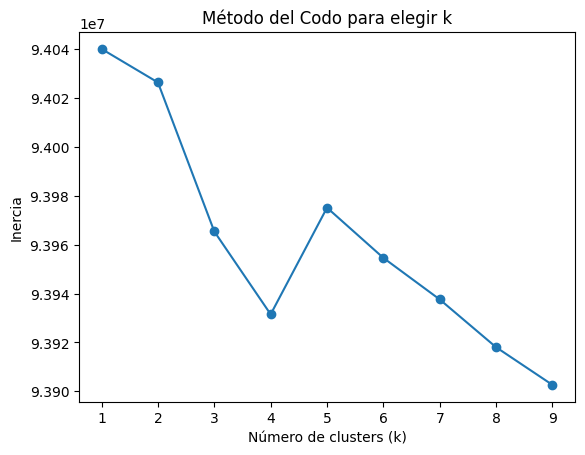

In [ ]:
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir k')
plt.show()

Se aplica el algoritmo K-Means (k=2) para identificar grupos naturales en los datos.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster'] = clusters

In [ ]:
data['cluster'].value_counts()

,count
cluster,
4,12967
1,8
2,2
3,2
0,1


## ahora intentamos con dbscan:

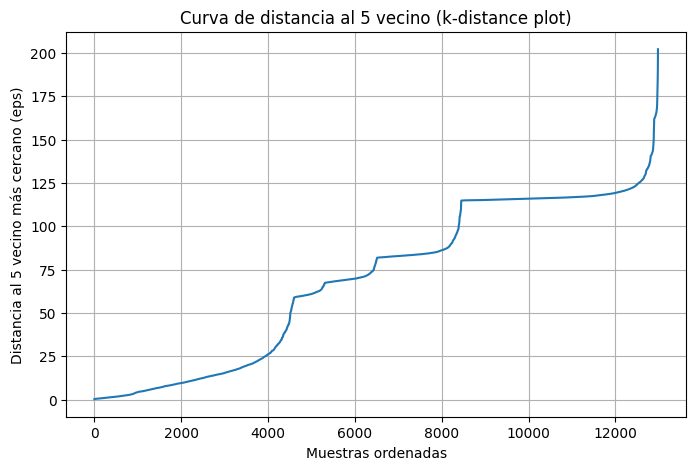

In [ ]:
# Elegir el valor de k (generalmente igual a min_samples de DBSCAN)
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)

# Calcular las distancias
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias del k-ésimo vecino
k_distances = np.sort(distances[:, k-1])

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel(f'Distancia al {k} vecino más cercano (eps)' )
plt.xlabel('Muestras ordenadas')
plt.title(f'Curva de distancia al {k} vecino (k-distance plot)')
plt.grid(True)
plt.show()

## aplicamos dbscan con los parametros dados por nuestra grafica

In [ ]:
dbscan = DBSCAN(eps=60, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [ ]:
# Reemplazar ruido de DBSCAN por un número válido
data['dbscan_cluster'] = data['dbscan_cluster'].apply(lambda x: x if x != -1 else 999)  # usar 999 como código para ruido

# concatenar como nueva feauture:
X_dbscan = np.hstack([X_scaled, data['dbscan_cluster'].values.reshape(-1, 1)])


In [ ]:
data['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
999,7997
0,4960
3,7
2,6
1,5
4,5


## separamos train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dbscan, data['rating_class'], test_size=0.2, random_state=42)


## entrenamos random forest

In [ ]:
clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced')
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

## predecimos y evaluamos


In [ ]:
y_pred = clf.predict(X_test)
print("Clasificación con DBSCAN como feature:")
print(classification_report(y_test, y_pred, zero_division=0))

Clasificación con DBSCAN como feature:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      0.11      0.19       123
           2       0.72      0.73      0.73      1046
           3       0.80      0.86      0.83      1419

    accuracy                           0.77      2596
   macro avg       0.60      0.42      0.44      2596
weighted avg       0.77      0.77      0.75      2596



## Matriz de confusión

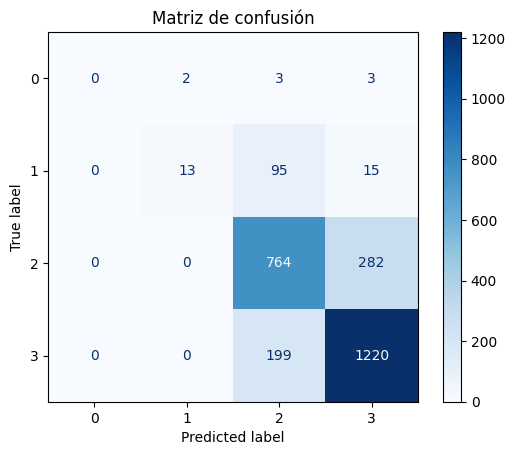

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.show()

observamos que esto sigue sin fuinonar, por el desbalanceamiento de clases, ahora probemos smote

## aplicamos smote a los datos de training

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


## entrenamos nuevamente random forest

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

## predecimos y evaluamos

In [ ]:
y_pred = clf.predict(X_test)
print("Clasificación con DBSCAN + SMOTE:")
print(classification_report(y_test, y_pred, zero_division=0))

Clasificación con DBSCAN + SMOTE:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.70      0.11      0.20       123
           2       0.71      0.74      0.73      1046
           3       0.81      0.84      0.83      1419

    accuracy                           0.77      2596
   macro avg       0.55      0.43      0.44      2596
weighted avg       0.76      0.77      0.75      2596



## mtriz de confusion

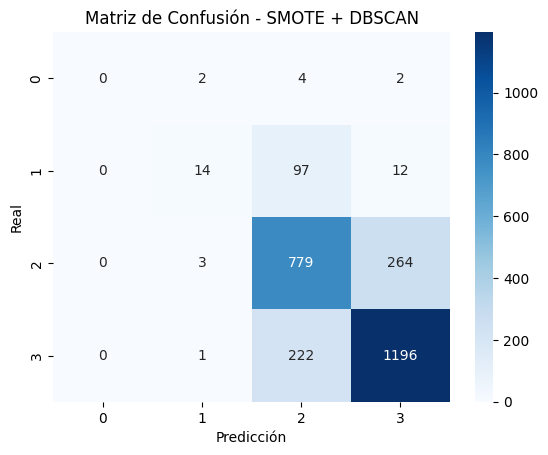

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - SMOTE + DBSCAN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Sigue sin aprender, ahora vamos a samplear las clases

In [ ]:
# Paso 1: Concatenar X_scaled con rating_class para facilitar el manejo
df = pd.DataFrame(X_scaled)
df['rating_class'] = data['rating_class'].values

# Paso 2: Submuestreo balanceado (33 por clase)
df_balanced = df.groupby('rating_class').sample(n=33, random_state=42)

# Paso 3: Separar X e y otra vez
X_bal = df_balanced.drop(columns=['rating_class']).values
y_bal = df_balanced['rating_class'].values

# Paso 4: Train/test split + Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Clasificación con dataset balanceado por undersampling:")
print(classification_report(y_test, y_pred, zero_division=0))

Clasificación con dataset balanceado por undersampling:
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.75      0.30      0.43        10
           2       0.33      1.00      0.50         4
           3       0.71      1.00      0.83         5

    accuracy                           0.56        27
   macro avg       0.64      0.67      0.57        27
weighted avg       0.68      0.56      0.54        27



##matriz de confision

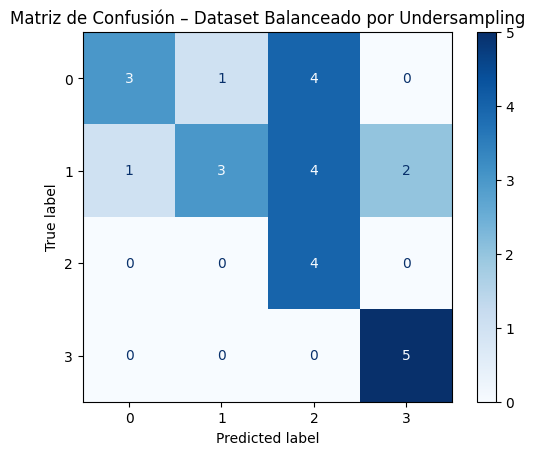

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión – Dataset Balanceado por Undersampling")
plt.show()

In [ ]:
y_pred_full = clf.predict(X_scaled)


In [ ]:
print("Clasificación del modelo entrenado con undersampling sobre el dataset original:")
print(classification_report(data['rating_class'], y_pred_full, zero_division=0))


Clasificación del modelo entrenado con undersampling sobre el dataset original:
              precision    recall  f1-score   support

           0       0.03      0.85      0.07        33
           1       0.14      0.39      0.21       669
           2       0.45      0.51      0.48      5348
           3       0.62      0.39      0.48      6930

    accuracy                           0.44     12980
   macro avg       0.31      0.53      0.31     12980
weighted avg       0.53      0.44      0.46     12980



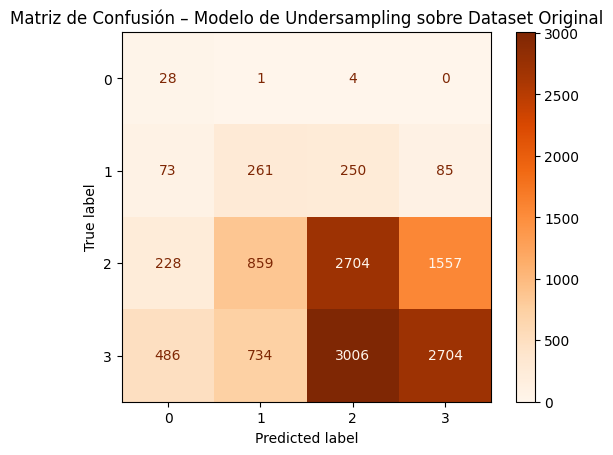

In [ ]:
cm_full = confusion_matrix(data['rating_class'], y_pred_full)
disp_full = ConfusionMatrixDisplay(confusion_matrix=cm_full, display_labels=[0, 1, 2, 3])
disp_full.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión – Modelo de Undersampling sobre Dataset Original")
plt.show()